#  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df= pd.read_csv(r"C:\Users\shivani\Downloads\archive (8)\Spam_SMS.csv", encoding='latin1')

In [3]:
df

,ï»¿Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.rename(columns={'ï»¿Class':'class'},inplace=True)

In [5]:
df

,class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [6]:
df['length']= df['Message'].apply(len)

In [7]:
df

,class,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,161
5570,ham,Will Ã¼ b going to esplanade fr home?,37
5571,ham,"Pity, * was in mood for that. So...any other s...",57
5572,ham,The guy did some bitching but I acted like i'd...,125


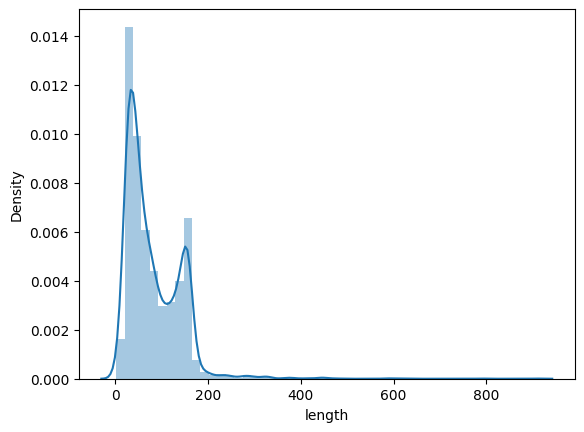

In [8]:
sns.distplot(df['length'])
plt.show()

 # Visualization by Pie chart

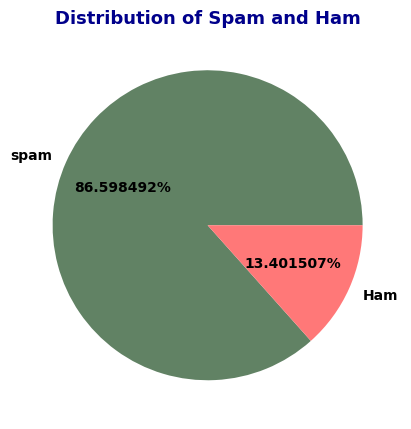

In [9]:
plt.figure(figsize=(5,7))
plt.pie(df['class'].value_counts(),autopct='%2f%%',labels= ['spam','Ham'],colors=['#618264','#FF7878'],
       textprops={'fontsize':10, 'fontweight':'bold'})
plt.title('Distribution of Spam and Ham', fontweight='bold',fontsize=13,color='darkblue')
plt.show()

# Statistical Analysis of Text Lengths in Spam-Ham Dataset

In [10]:
print('Mean Length:', df['length'].mean())
print('Median Length:', df['length'].median())
print('Std Deviation Length:', df['length'].std())
print('Max Length:', df['length'].max())
print('Min Length:', df['length'].min())

Mean Length: 80.5794761392178
Median Length: 62.0
Std Deviation Length: 59.91962780701787
Max Length: 910
Min Length: 2


In [11]:
df[df['length']== 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [12]:
df[df['length']==2]['Message'].iloc[0]

'Ok'

In [13]:
df['class'].value_counts()

class
ham     4827
spam     747
Name: count, dtype: int64

#  Text Cleaning

In [14]:
df

,class,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,161
5570,ham,Will Ã¼ b going to esplanade fr home?,37
5571,ham,"Pity, * was in mood for that. So...any other s...",57
5572,ham,The guy did some bitching but I acted like i'd...,125


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
stop_words= stopwords.words('english')

In [17]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
df['Message']= df['Message'].str.lower()

In [19]:
df['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5569    this is the 2nd time we have tried 2 contact u...
5570                will ã¼ b going to esplanade fr home?
5571    pity, * was in mood for that. so...any other s...
5572    the guy did some bitching but i acted like i'd...
5573                           rofl. its true to its name
Name: Message, Length: 5574, dtype: object

In [20]:
ls=[]

for i in df['Message'][0].split():
    if i not in stop_words:
        ls.append(i)
    

In [21]:
ls

['go',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'got',
 'amore',
 'wat...']

In [22]:
" ".join(ls)

'go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...'

In [23]:
def stop_word_clean(x):
    return " ".join([words for words in str(x).split() if words not in stop_words])

In [24]:
df['Message']= df['Message'].apply(lambda x:stop_word_clean(x))

In [25]:
df

,class,Message,length
0,ham,"go jurong point, crazy.. available bugis n gre...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,u dun say early hor... u c already say...,49
4,ham,"nah think goes usf, lives around though",61
...,...,...,...
5569,spam,2nd time tried 2 contact u. u â£750 pound priz...,161
5570,ham,ã¼ b going esplanade fr home?,37
5571,ham,"pity, * mood that. so...any suggestions?",57
5572,ham,guy bitching acted like i'd interested buying ...,125


In [26]:
df['after_stopwords']= df['Message'].apply(len)

In [27]:
df.head()

,class,Message,length,after_stopwords
0,ham,"go jurong point, crazy.. available bugis n gre...",111,91
1,ham,ok lar... joking wif u oni...,29,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,141
3,ham,u dun say early hor... u c already say...,49,41
4,ham,"nah think goes usf, lives around though",61,39


In [28]:
def removal_url(Message):
     return re.sub('https?://(?:www\.)?[\w\.-]+\.[a-zA-Z]{2,}(?:/[\w\.-]*)*/?','',Message)
    

In [29]:
df['Message']= df['Message'].apply(lambda x: removal_url(x))

In [30]:
df['after_url']= df['Message'].apply(len)

In [31]:
df.head()

,class,Message,length,after_stopwords,after_url
0,ham,"go jurong point, crazy.. available bugis n gre...",111,91,91
1,ham,ok lar... joking wif u oni...,29,29,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,141,141
3,ham,u dun say early hor... u c already say...,49,41,41
4,ham,"nah think goes usf, lives around though",61,39,39


In [32]:
def removal_username(Message):
    return re.sub('@[^\s]+','',Message)

In [33]:
df['Message']= df['Message'].apply(lambda x: removal_username(x))

In [34]:
df['after_username']=df['Message'].apply(len)

In [35]:
df.head()

,class,Message,length,after_stopwords,after_url,after_username
0,ham,"go jurong point, crazy.. available bugis n gre...",111,91,91,91
1,ham,ok lar... joking wif u oni...,29,29,29,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,141,141,141
3,ham,u dun say early hor... u c already say...,49,41,41,41
4,ham,"nah think goes usf, lives around though",61,39,39,39


In [36]:
def removal_number(Message):
    return re.sub('[0-9]+','', Message)

In [37]:
df['Message']= df['Message'].apply(lambda x:removal_number(x) )

In [38]:
df['after_digits']= df['Message'].apply(len)

In [39]:
df

,class,Message,length,after_stopwords,after_url,after_username,after_digits
0,ham,"go jurong point, crazy.. available bugis n gre...",111,91,91,91,91
1,ham,ok lar... joking wif u oni...,29,29,29,29,29
2,spam,free entry wkly comp win fa cup final tkts st...,155,141,141,141,116
3,ham,u dun say early hor... u c already say...,49,41,41,41,41
4,ham,"nah think goes usf, lives around though",61,39,39,39,39
...,...,...,...,...,...,...,...
5569,spam,nd time tried contact u. u â£ pound prize. c...,161,120,120,120,99
5570,ham,ã¼ b going esplanade fr home?,37,29,29,29,29
5571,ham,"pity, * mood that. so...any suggestions?",57,40,40,40,40
5572,ham,guy bitching acted like i'd interested buying ...,125,83,83,83,83


In [40]:
import string
punc= string.punctuation

In [41]:
def removal_punc(Message):
    trans= str.maketrans('','',punc)
    return Message.translate(trans)

In [42]:
df["Message"]=df["Message"].apply(lambda x: removal_punc(x))

In [43]:
df["after_punctuation"]= df["Message"].apply(len)

In [44]:
df.head()

,class,Message,length,after_stopwords,after_url,after_username,after_digits,after_punctuation
0,ham,go jurong point crazy available bugis n great ...,111,91,91,91,91,82
1,ham,ok lar joking wif u oni,29,29,29,29,29,23
2,spam,free entry wkly comp win fa cup final tkts st...,155,141,141,141,116,110
3,ham,u dun say early hor u c already say,49,41,41,41,41,35
4,ham,nah think goes usf lives around though,61,39,39,39,39,38


In [45]:
df['after_punctuation'].max()

511

In [46]:
df[df['after_punctuation']==511]['Message'].iloc[0]

'love start attractioni feel need every time around meshe first thing comes thoughtsi would start day end hershe every time dreamlove every breath namemy life happen around hermy life named heri would cry herwill give happiness take sorrowsi ready fight anyone heri love craziest things herlove proove anyone girl beautiful lady whole planeti always singing praises herlove start making chicken curry end makiing sambarlife beautiful thenwill get every morning thank god day mei would like say lotwill tell later'

In [47]:
def removal_xhtml(Message):
    pattern= re.compile(r"quot")
    return re.sub(pattern,"",Message)

In [48]:
df['Message']= df['Message'].apply(lambda x: removal_xhtml(x))
df["after_removal_xhtml"]= df["Message"].apply(len)

In [49]:
df

,class,Message,length,after_stopwords,after_url,after_username,after_digits,after_punctuation,after_removal_xhtml
0,ham,go jurong point crazy available bugis n great ...,111,91,91,91,91,82,82
1,ham,ok lar joking wif u oni,29,29,29,29,29,23,23
2,spam,free entry wkly comp win fa cup final tkts st...,155,141,141,141,116,110,110
3,ham,u dun say early hor u c already say,49,41,41,41,41,35,35
4,ham,nah think goes usf lives around though,61,39,39,39,39,38,38
...,...,...,...,...,...,...,...,...,...
5569,spam,nd time tried contact u u â£ pound prize cla...,161,120,120,120,99,91,91
5570,ham,ã¼ b going esplanade fr home,37,29,29,29,29,28,28
5571,ham,pity mood that soany suggestions,57,40,40,40,40,33,33
5572,ham,guy bitching acted like id interested buying s...,125,83,83,83,83,82,82


In [50]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [51]:
df["Message"]=df["Message"].apply(lambda x: deEmojify(x))
df["after_deEmojify"]= df["Message"].apply(len)

In [52]:
df

,class,Message,length,after_stopwords,after_url,after_username,after_digits,after_punctuation,after_removal_xhtml,after_deEmojify
0,ham,go jurong point crazy available bugis n great ...,111,91,91,91,91,82,82,82
1,ham,ok lar joking wif u oni,29,29,29,29,29,23,23,23
2,spam,free entry wkly comp win fa cup final tkts st...,155,141,141,141,116,110,110,110
3,ham,u dun say early hor u c already say,49,41,41,41,41,35,35,35
4,ham,nah think goes usf lives around though,61,39,39,39,39,38,38,38
...,...,...,...,...,...,...,...,...,...,...
5569,spam,nd time tried contact u u pound prize claim...,161,120,120,120,99,91,91,89
5570,ham,b going esplanade fr home,37,29,29,29,29,28,28,26
5571,ham,pity mood that soany suggestions,57,40,40,40,40,33,33,33
5572,ham,guy bitching acted like id interested buying s...,125,83,83,83,83,82,82,82


In [53]:
def removal_extraspace(Message):
    return re.sub('\s+',' ',Message)

In [54]:
df['Message']= df['Message'].apply(lambda x: removal_extraspace(x))
df['after_white_space']= df['Message'].apply(len)

In [55]:
df

,class,Message,length,after_stopwords,after_url,after_username,after_digits,after_punctuation,after_removal_xhtml,after_deEmojify,after_white_space
0,ham,go jurong point crazy available bugis n great ...,111,91,91,91,91,82,82,82,82
1,ham,ok lar joking wif u oni,29,29,29,29,29,23,23,23,23
2,spam,free entry wkly comp win fa cup final tkts st ...,155,141,141,141,116,110,110,110,107
3,ham,u dun say early hor u c already say,49,41,41,41,41,35,35,35,35
4,ham,nah think goes usf lives around though,61,39,39,39,39,38,38,38,38
...,...,...,...,...,...,...,...,...,...,...,...
5569,spam,nd time tried contact u u pound prize claim ea...,161,120,120,120,99,91,91,89,85
5570,ham,b going esplanade fr home,37,29,29,29,29,28,28,26,26
5571,ham,pity mood that soany suggestions,57,40,40,40,40,33,33,33,32
5572,ham,guy bitching acted like id interested buying s...,125,83,83,83,83,82,82,82,82


In [56]:
df['after_white_space'].max()

511

In [57]:
df[df['after_white_space']==511]['Message'].iloc[0]

'love start attractioni feel need every time around meshe first thing comes thoughtsi would start day end hershe every time dreamlove every breath namemy life happen around hermy life named heri would cry herwill give happiness take sorrowsi ready fight anyone heri love craziest things herlove proove anyone girl beautiful lady whole planeti always singing praises herlove start making chicken curry end makiing sambarlife beautiful thenwill get every morning thank god day mei would like say lotwill tell later'

In [58]:
df.describe()

,length,after_stopwords,after_url,after_username,after_digits,after_punctuation,after_removal_xhtml,after_deEmojify,after_white_space
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,80.579476,59.592214,59.522426,59.482060,57.105310,53.020811,53.013635,52.766774,52.148009
std,59.919628,46.002501,45.942061,45.892297,43.158106,40.139698,40.129310,39.973508,39.341938
min,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,25.000000,25.000000,25.000000,25.000000,23.000000,23.000000,23.000000,23.000000
50%,62.000000,44.000000,44.000000,44.000000,43.000000,40.000000,40.000000,40.000000,40.000000
75%,122.750000,88.000000,88.000000,88.000000,84.750000,79.000000,79.000000,78.000000,77.000000
max,910.000000,550.000000,550.000000,550.000000,546.000000,511.000000,511.000000,511.000000,511.000000


In [59]:
df.isna().sum()

class                  0
Message                0
length                 0
after_stopwords        0
after_url              0
after_username         0
after_digits           0
after_punctuation      0
after_removal_xhtml    0
after_deEmojify        0
after_white_space      0
dtype: int64

In [60]:
df.duplicated().sum()

436

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df

,class,Message,length,after_stopwords,after_url,after_username,after_digits,after_punctuation,after_removal_xhtml,after_deEmojify,after_white_space
0,ham,go jurong point crazy available bugis n great ...,111,91,91,91,91,82,82,82,82
1,ham,ok lar joking wif u oni,29,29,29,29,29,23,23,23,23
2,spam,free entry wkly comp win fa cup final tkts st ...,155,141,141,141,116,110,110,110,107
3,ham,u dun say early hor u c already say,49,41,41,41,41,35,35,35,35
4,ham,nah think goes usf lives around though,61,39,39,39,39,38,38,38,38
...,...,...,...,...,...,...,...,...,...,...,...
5569,spam,nd time tried contact u u pound prize claim ea...,161,120,120,120,99,91,91,89,85
5570,ham,b going esplanade fr home,37,29,29,29,29,28,28,26,26
5571,ham,pity mood that soany suggestions,57,40,40,40,40,33,33,33,32
5572,ham,guy bitching acted like id interested buying s...,125,83,83,83,83,82,82,82,82


In [63]:
df['after_white_space'].min()

0

In [64]:
drop_index= df[df['after_white_space']==df['after_white_space'].min()][['class']].index

In [65]:
drop_index

Index([960, 1612, 3376], dtype='int64')

In [66]:
df.drop(drop_index,inplace=True)

In [67]:
df.shape

(5135, 11)

In [68]:
df.drop(df.columns[2:],axis=1,inplace=True)

In [69]:
df

,class,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5569,spam,nd time tried contact u u pound prize claim ea...
5570,ham,b going esplanade fr home
5571,ham,pity mood that soany suggestions
5572,ham,guy bitching acted like id interested buying s...


#  Separating data as text & label

In [70]:
x= df['Message']
y= df['class']

#  Splitting data into training  & testing

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42,shuffle=True,stratify=y)

In [73]:
print('x_Training shape:', x_train.shape)
print('x_Testing shape:', x_test.shape)
print('y_Training shape:', y_train.shape)
print('y_testing size:', y_test.shape)

x_Training shape: (4108,)
x_Testing shape: (1027,)
y_Training shape: (4108,)
y_testing size: (1027,)


# Importing TensorFlow Libraries and Defining Model Layers for Spam-Ham Classification

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding, GRU,Dense

# Tokenize and pad sequences

In [75]:
max_vocab_size= 20000
max_sequence_length= 100

In [76]:
tokenizer= Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)

In [77]:
print(tokenizer)

In [78]:
x_train_seq= tokenizer.texts_to_sequences(x_train)
x_test_seq= tokenizer.texts_to_sequences(x_test)

In [79]:
x_train[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [80]:
x_train_seq[0]

[879, 2070, 72]

In [81]:
x_train_seq

[[879, 2070, 72],
 [259, 98, 459, 9, 39, 127, 22, 1597, 432, 3049, 2, 185, 99, 2, 163],
 [98, 157, 98, 1598, 49, 408, 49],
 [2, 696, 2, 3050, 20, 2071, 2072, 1599, 2071, 2072, 1599, 20, 769, 20],
 [110, 488, 3051, 226],
 [10, 116, 54, 770, 3052, 1312, 3053, 988, 368, 520, 2073, 14, 350],
 [2074, 96, 1132, 3054, 289, 18],
 [1133,
  3055,
  25,
  66,
  369,
  1600,
  79,
  568,
  643,
  79,
  269,
  3056,
  1,
  3057,
  94,
  246,
  65,
  1601],
 [75, 1313, 644, 51, 370, 602, 370],
 [79, 697, 3058, 989],
 [50, 158, 49, 207, 990, 44, 103],
 [42, 128, 409, 3059, 371, 991, 2075, 21, 34, 186, 152],
 [4, 3060, 489, 1602, 603, 880, 77, 521, 8, 992, 880, 1314, 117, 77],
 [216,
  522,
  1134,
  52,
  146,
  522,
  40,
  522,
  9,
  270,
  44,
  372,
  36,
  146,
  16,
  1135,
  1136],
 [698, 23, 66, 196],
 [187, 111, 3061, 67, 523, 106, 3, 175, 152, 1137],
 [26,
  24,
  1138,
  69,
  61,
  227,
  26,
  68,
  604,
  24,
  1138,
  176,
  69,
  5,
  172,
  118,
  490,
  2076,
  129,
  47],
 [260, 3

In [82]:
x_train_pad= pad_sequences(x_train_seq,maxlen= max_sequence_length )
x_test_pad= pad_sequences(x_test_seq,maxlen=max_sequence_length)

In [83]:
x_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  879, 2070,
         72])

#  Building a Long-short term memory (LSTM)

In [84]:
embedding_dim=50
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [85]:
model= Sequential()
model.add(Embedding(input_dim=max_vocab_size,output_dim=embedding_dim,input_length=max_sequence_length ))
model.add(LSTM(units=120,return_sequences=True))
model.add(LSTM(units=90,return_sequences=True))
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=30,return_sequences=False))
model.add(Dense(1, activation= 'sigmoid'))

# Compile the neural network

In [86]:
opti= 'adam'
loss='binary_crossentropy'
metrics= ['accuracy']
epoch=5 
batch_size=32

In [87]:
model.compile(loss=loss, optimizer=opti, metrics=metrics)

#  Creating labels for two class of mails

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le= LabelEncoder()

In [90]:
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

In [91]:
y_test

array([1, 0, 0, ..., 0, 1, 0])

# Training the neural network

In [92]:
hist= model.fit(x_train_pad,y_train,epochs=epoch, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.8664 - loss: 0.3914 - val_accuracy: 0.9513 - val_loss: 0.1312
Epoch 2/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.9780 - loss: 0.0756 - val_accuracy: 0.9696 - val_loss: 0.0950
Epoch 3/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.9900 - loss: 0.0385 - val_accuracy: 0.9684 - val_loss: 0.0921
Epoch 4/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.9951 - loss: 0.0175 - val_accuracy: 0.9732 - val_loss: 0.0991
Epoch 5/5
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.9980 - loss: 0.0078 - val_accuracy: 0.9732 - val_loss: 0.1133


# Evaluate the model

In [93]:
test_loss, test_accuracy= model.evaluate(x_test_pad,y_test)
print(f'Test Accuracy: {test_accuracy}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9833 - loss: 0.0669
Test Accuracy: 0.9785783886909485


In [94]:
test_loss

0.08607272058725357

#  Building a predictive system

In [123]:
def preprocess_text(Message, tokenizer, max_sequence_length, model):
    text_seq = tokenizer.texts_to_sequences([Message])
    text_pad = pad_sequences(text_seq, maxlen=max_sequence_length)
    prediction = model.predict(text_pad)
    label = "Spam" if prediction >= 0.5 else "Ham"
    return label

In [124]:
message = "Sorry, I'll call later in the meeting."
label = preprocess_text(message, tokenizer, max_sequence_length=100, model=model)
print("Prediction:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: Ham


In [125]:
message= "FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com"
label= preprocess_text(message,tokenizer,max_sequence_length=100,model=model)
print("Prediction:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Spam
